# **Predicting Car Prices**

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations.

# Environment Setup

In [31]:
# import required packages
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

# Special package to report regression summary statistics
# !pip install -U dmba;
from dmba import regressionSummary

In [32]:
# connect to Google Drive and load the data
# from google.colab import drive
# drive.mount('/content/drive')
car_df = pd.read_csv('../data/ToyotaCorolla.csv')
car_df.info()
car_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


Use the following variables as predictors: Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar

## Preprocessing

In [33]:
# select relevant variables, Price and 15 predictors
selected_var = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 
                'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 
                'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar']
car_df = car_df[selected_var]

In [34]:
# Data exploration: look at number of unique entries for some of the columns
print(car_df.Age_08_04.unique())
print(car_df.Fuel_Type.unique())
print(car_df.HP.unique())
print(car_df.Doors.unique())

[23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]
['Diesel' 'Petrol' 'CNG']
[ 90 192  69 110  97  71 116  98  86  72 107  73]
[3 5 4 2]


In [35]:
# convert categorical data into dummy variables, in this case Fuel_Type
car_df = pd.get_dummies(car_df, columns=['Fuel_Type'], drop_first=True)
car_df.head()

,Price,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,1,0
1,13750,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0
2,13950,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,1,0
3,14950,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,1,0
4,13750,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,1,0


In [36]:
# separate out output neuron and input neurons
y_nonscaled = car_df[['Price']]
X_nonscaled = car_df.drop(columns=['Price'])
X_nonscaled.head()

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,3,210,0,3,0,0,0,1,0,0,1,0
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0
2,24,41711,90,0,3,210,1,3,0,0,0,0,0,0,1,0
3,26,48000,90,0,3,210,1,3,0,0,0,0,0,0,1,0
4,30,38500,90,0,3,210,1,3,1,0,0,1,0,0,1,0


In [37]:
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

# partition data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
# Check normalization worked
X_train[0,:]

array([0.84810127, 0.42798119, 0.13821138, 0.        , 0.33333333,
       0.        , 0.        , 0.09090909, 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        ])

## Neural Network with a single hidden layer and 2 nodes

In [39]:
# train neural network with single hidden layer and 2 nodes
# function: MLPRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# options:
# hidden_layer_sizes = (2, 4, ..., 1)  number of neurons in each hidden layer
# activation = 'logistic'
# solver = 'lbfgs'
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train.ravel())

MLPRegressor(activation='logistic', hidden_layer_sizes=2, random_state=1,
             solver='lbfgs')

In [40]:
# Make price predictions
y_pred = car_nnet.predict(X_train)

In [41]:
# Check out the range of predicted prices (min and max)
print('min predicted price:',  min(y_pred), "max predicted price", max(y_pred))

min predicted price: 0.03679113601622419 max predicted price 0.830896255248863


All prices are between 0 and 1 since we normalized... hence, we have to "denormalize" to return back to our original space of prices

In [42]:
# Inverse scaling using inverse_transform function
# Note: append the ravel() function to reformat the output of inverse_transform()
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()

In [43]:
print('min predicted price:',  min(y_pred), "max predicted price", max(y_pred))

min predicted price: 5385.670478856711 max predicted price 27739.729585255496


In [44]:
# Run regression summary to check RMSE
regressionSummary(y_pred, y_actual)


Regression statistics

                      Mean Error (ME) : 2.7896
       Root Mean Squared Error (RMSE) : 1103.6528
            Mean Absolute Error (MAE) : 826.8883
          Mean Percentage Error (MPE) : 0.0066
Mean Absolute Percentage Error (MAPE) : 8.0014



Validation data (2)

Regression statistics

                      Mean Error (ME) : -88.0197
       Root Mean Squared Error (RMSE) : 1028.8376
            Mean Absolute Error (MAE) : 802.6673
          Mean Percentage Error (MPE) : -0.8984
Mean Absolute Percentage Error (MAPE) : 8.0160


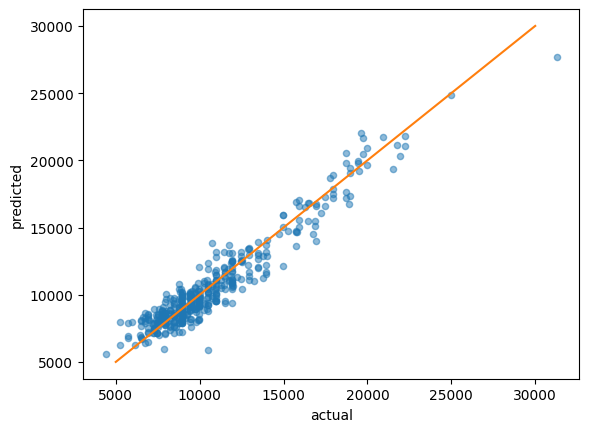

In [45]:
# predict and compute RMSE for validation set
print('\nValidation data (2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

## Neural Network with a single hidden layer and 5 nodes

Training data (5)

Regression statistics

                      Mean Error (ME) : 0.1938
       Root Mean Squared Error (RMSE) : 1137.8440
            Mean Absolute Error (MAE) : 845.9565
          Mean Percentage Error (MPE) : -0.1377
Mean Absolute Percentage Error (MAPE) : 8.1885

Validation data (5)

Regression statistics

                      Mean Error (ME) : -79.3568
       Root Mean Squared Error (RMSE) : 1082.7346
            Mean Absolute Error (MAE) : 849.3086
          Mean Percentage Error (MPE) : -1.0975
Mean Absolute Percentage Error (MAPE) : 8.5880


/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


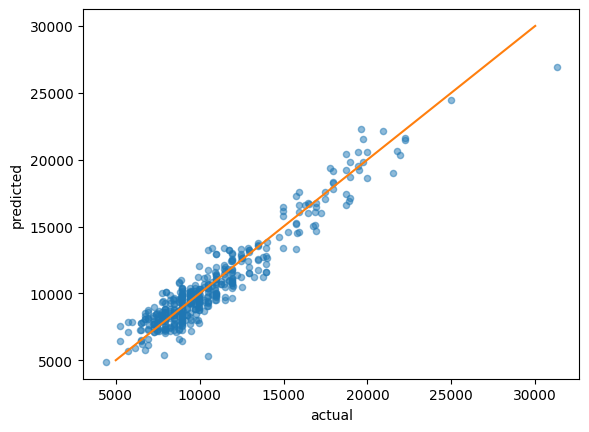

In [46]:
# train neural network with single hidden layer and 5 hidden nodes
car_nnet = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train)

# RMSE for training set
print('Training data (5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

## Deep learning: Neural Network with 3 hidden layers, each with 2 nodes

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training data (2, 2, 2)

Regression statistics

                      Mean Error (ME) : -1.1626
       Root Mean Squared Error (RMSE) : 1182.3273
            Mean Absolute Error (MAE) : 862.7597
          Mean Percentage Error (MPE) : 0.0191
Mean Absolute Percentage Error (MAPE) : 8.2213

Validation data (2, 2, 2)

Regression statistics

                      Mean Error (ME) : -104.2077
       Root Mean Squared Error (RMSE) : 1120.8665
            Mean Absolute Error (MAE) : 858.0999
          Mean Percentage Error (MPE) : -0.9492
Mean Absolute Percentage Error (MAPE) : 8.4219


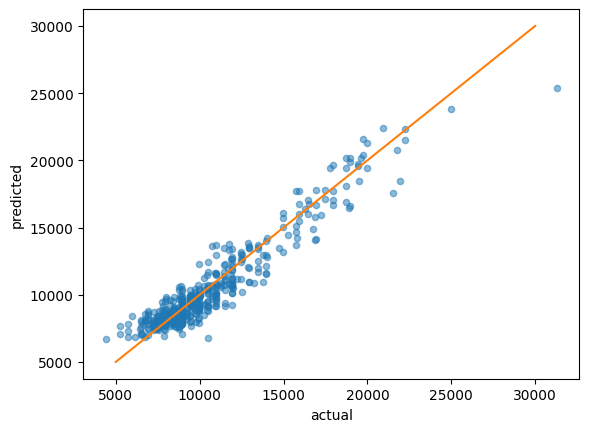

In [47]:
car_nnet = MLPRegressor(hidden_layer_sizes=(2, 2, 2), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train)

# RMSE for training set
print('Training data (2, 2, 2)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (2, 2, 2)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

## Deep learning: Neural Network with 3 hidden layers, each with 5 nodes

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training data (5, 5, 5)

Regression statistics

                      Mean Error (ME) : -0.1309
       Root Mean Squared Error (RMSE) : 3662.5855
            Mean Absolute Error (MAE) : 2639.2748
          Mean Percentage Error (MPE) : -0.0306
Mean Absolute Percentage Error (MAPE) : 24.5531

Validation data (5, 5, 5)

Regression statistics

                      Mean Error (ME) : 82.9015
       Root Mean Squared Error (RMSE) : 3571.3028
            Mean Absolute Error (MAE) : 2623.7978
          Mean Percentage Error (MPE) : 0.7355
Mean Absolute Percentage Error (MAPE) : 24.4064


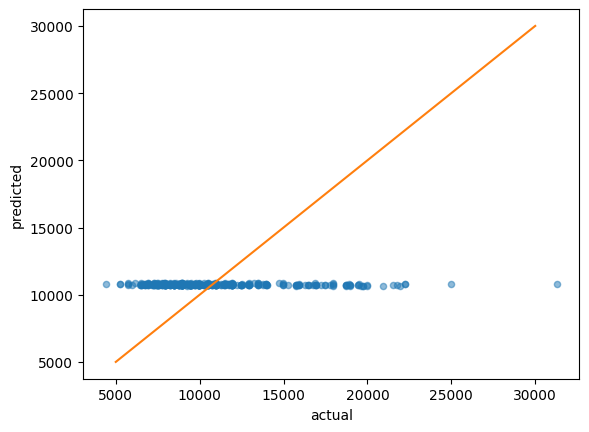

In [48]:
car_nnet = MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='logistic', solver='lbfgs', random_state=1)
car_nnet.fit(X_train, y_train)

# RMSE for training set
print('Training data (5, 5, 5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5, 5, 5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

Total failure... we need more iterations! (too many parameters need fitting)

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training data (5, 5, 5)

Regression statistics

                      Mean Error (ME) : -0.3759
       Root Mean Squared Error (RMSE) : 1049.6984
            Mean Absolute Error (MAE) : 789.0193
          Mean Percentage Error (MPE) : -0.0486
Mean Absolute Percentage Error (MAPE) : 7.6688

Validation data (5, 5, 5)

Regression statistics

                      Mean Error (ME) : -77.1741
       Root Mean Squared Error (RMSE) : 1101.6619
            Mean Absolute Error (MAE) : 849.7141
          Mean Percentage Error (MPE) : -0.9367
Mean Absolute Percentage Error (MAPE) : 8.6019


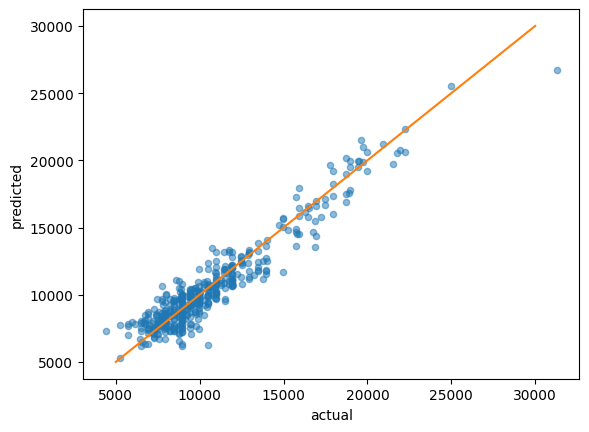

In [49]:
# Let's try to change the activation function
car_nnet = MLPRegressor(hidden_layer_sizes=(5, 5, 5), 
                        activation='relu', solver='lbfgs', 
                        random_state=1)
car_nnet.fit(X_train, y_train)

# RMSE for training set
print('Training data (5, 5, 5)')
y_actual = scaleOutput.inverse_transform(y_train).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_train)]).ravel()
regressionSummary(y_pred, y_actual)

# RMSE for validation set
print('\nValidation data (5, 5, 5)')
y_actual = scaleOutput.inverse_transform(y_valid).ravel()
y_pred = scaleOutput.inverse_transform([car_nnet.predict(X_valid)]).ravel()
regressionSummary(y_pred, y_actual)

# plot predicted vs actual values
pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5)
plt.plot([5000, 30000], [5000, 30000], color='C1');

## Summary

Architecture|NN (2) log. | NN (5) log. | NN (2,2,2) log. | NN (5,5,5) log. | NN (5,5,5) relu|
---|---|---|---|---|---|
RMSE valid.|1104|1083|1065|3571|1083
    
Overall, the neural network architecture has only little effect on the regression performance, except in deep learning where parameters start increasing, there, we need to be more diligent.

Fine-tuning neural networks, especially in deep learning context, is not trivial... recommend taking a deep learning class!
